# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

There are 45053 unique listing in the LA dataset, and there are 26286 unique hosts

In [1]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)
import pandas as pd
import numpy as np
#I put the csv in the same file of this notebook.
#the csv has 45053 rows and 16 columns
df_list = pd.read_csv('listings.csv')
df_review = pd.read_csv('reviews.csv')
df_calendar = pd.read_csv('calendar.csv')
print(df_list.shape[0],len(df_list.host_id.unique()))

45053 26286


### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

The mean of the number of listings is 1.66; the median is 1, the standard deviation is 2.9, the minimum number is 1, and the maximum number is 172.

In [2]:
# You need to provide the code to answer the previous quesiton
#here we first filter the city with los angeles and then group by the host id. 
df_list.groupby(by = ['host_id'])['id'].count().describe()

count    26286.000000
mean         1.713954
std          2.999183
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        172.000000
Name: id, dtype: float64

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

The average deviation number of listings for a super host is 1.82 and that for a non-super host is 1.67. The standard deviation is 3.17 and 2.96 respectively.

In [3]:
# You need to provide the code to answer the previous quesiton
df_super = df_list[df_list['host_is_superhost'] == 't']
df_super.groupby(by = ['host_id'])['id'].nunique().agg([np.mean,np.std])
df_nonsuper = df_list[df_list['host_is_superhost'] == 'f']
print(df_super.groupby(by = ['host_id'])['id'].nunique().agg([np.mean,np.std]),df_nonsuper.groupby(by = ['host_id'])['id'].nunique().agg([np.mean,np.std]))

mean    1.824264
std     3.177892
Name: id, dtype: float64 mean    1.671021
std     2.926276
Name: id, dtype: float64


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

There are 22 unique types of host. They are : '', 'sent_id', 'sesame', 'reviews', 'government_id', 'sesame_offline', 'email', 'kba', 'work_email', 'jumio', 'phone', 'manual_offline', 'facebook', 'manual_online', 'google', 'identity_manual', 'None', 'selfie', 'offline_government_id', 'photographer', 'weibo', 'zhima_selfie'

In [2]:
# You need to provide the code to answer the previous quesit
altype = []
for i in df_list['host_verifications'].tolist():
    altype += i.strip('[').strip(']').replace('\'','').replace(' ','').split(',')
print(set(altype),len(set(altype)))

{'', 'manual_online', 'identity_manual', 'sent_id', 'jumio', 'selfie', 'kba', 'email', 'government_id', 'work_email', 'reviews', 'google', 'facebook', 'offline_government_id', 'sesame', 'manual_offline', 'phone', 'None', 'weibo', 'photographer', 'sesame_offline', 'zhima_selfie'} 22


### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

The top 5 popular verification types are: phone:44881 99.67% of hosts verify the type,   
email:42359 93.83% verify that type ,  
reviews:32907 68.85% verify that type,   
government_id: 28789 58.76% verify that type   
and offline_government_id:20906 39.63% verify that type

In [3]:
# You need to provide the code to answer the previous quesiton
dict_type = {}
for i in altype:
    dict_type[i] = dict_type[i] +1 if i in dict_type else 1
topfive = dict(sorted(dict_type.items(), key = lambda x :x[1],reverse = True)[:5])
# dict(topfive)
dict_type_1 = {}
df_host = df_list.drop_duplicates(subset = ['host_id'], keep="first",inplace = False)
alltype = []
for i in df_host['host_verifications'].tolist():
    alltype += i.strip('[').strip(']').replace('\'','').replace(' ','').split(',')
for i in alltype:
    dict_type_1[i] = dict_type_1[i] +1 if i in dict_type_1 else 1
# topfive_1 = dict(sorted(dict_type_1.items(), key = lambda x :x[1],reverse = True))
for j in topfive.keys():
    print(j, dict_type_1.get(j)/df_host.shape[0])

phone 0.9967663394963098
email 0.9383702351061401
reviews 0.688541428897512
government_id 0.5876892642471278
offline_government_id 0.39633264855816785


### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

The mean price is 254.77 and the standard deviation of the price is 684.75.

In [4]:
# You need to provide the code to answer the previous quesiton
# df_list.last_scraped.apply(lambda x : x = int(x), axis = 1)
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
df_calendar[(df_calendar.date>= '2020-01-01' )& (df_calendar.date <= '2020-03-01') & (df_calendar.available == 't')].\
groupby(by = ['listing_id'])['price'].mean().agg([np.mean,np.std])

mean    254.778227
std     684.755050
Name: price, dtype: float64

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

The most popular ten words in Jan 2016 are: 'great', 'stay', 'place', 'would', 'us', 'house', 'nice', 'everything', 'location', 'really'.  
The most popular ten words in March 2017 are: great', 'place', 'stay', 'would', 'nice', 'location', 'clean', 'everything', 'definitely', 'house'.  
The most popular ten words in April 2018 are: great', 'place', 'stay', 'would', 'location', 'nice', 'clean', 'definitely', 'everything', 'house'.  


In [7]:
# You need to provide the code to answer the previous quesiton
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
df_review['date'] = pd.to_datetime(df_review['date'])
stopwordslist = list(set(stopwords.words('english')))
# df_review.dropna()
def popularwords(startdate,stopdate):
    comments_series=df_review[(df_review["date"]>=pd.to_datetime(startdate)) & \
                              (df_review["date"]<=pd.to_datetime(stopdate))]\
                              ["comments"].str.lower().str.split(" ")
    comments_series.dropna(axis=0,inplace=True)
    print(pd.value_counts([j for i in comments_series for j in i if \
                     j not in stopwordslist and j not in string.punctuation and j.isdigit()==False]).head(10).index.tolist())
popularwords("2017-3-1","2017-3-31")

['great', 'place', 'stay', 'would', 'nice', 'location', 'clean', 'everything', 'definitely', 'house']


In [8]:
popularwords('2016-1-1','2016-1-31')

['great', 'stay', 'place', 'would', 'us', 'house', 'nice', 'everything', 'location', 'really']


In [9]:
popularwords('2018-4-1','2018-4-30')

['great', 'place', 'stay', 'would', 'location', 'nice', 'clean', 'definitely', 'everything', 'house']


### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

The five zipcode that have the highest average listing price and have at least 30 listings90210	1963.557367; 90077	1909.066130 ; 93063	1567.562500; 90265	1559.605010 ; 90069	998.113153  
('90210', 'number of host is: 262, number of listing is: 391')  
('90077', 'number of host is: 68, number of listing is: 102')  
('93063', 'number of host is: 1, number of listing is: 2')  
('90265', 'number of host is: 321, number of listing is: 480')  
('90069', 'number of host is: 473, number of listing is: 666')  


In [10]:
# You need to provide the code to answer the previous quesiton
df_calendar_sm = df_calendar[['listing_id','date','price','available']]

df_list_sm = df_list[['id','zipcode','host_id']]
df_merge = df_list_sm.merge(df_calendar_sm,how = 'right', left_on = 'id', right_on = 'listing_id')
df_merge_1 = df_merge[(df_merge['date']>='2020-01-01')&(df_merge['date']<= '2020-02-01')\
                      & (df_merge['available'] == 't')]
df_avg = pd.DataFrame(df_merge_1.groupby('zipcode').filter(lambda x : len(x.listing_id)>=30).\
groupby('zipcode').price.mean()).sort_values('price',ascending = False).head()

df_avg.reset_index(inplace = True)

zipcodes = df_avg['zipcode'].tolist()
def numberofid(zipcode):
    df_merge_4 = df_merge[(df_merge['date']>='2020-01-01')&(df_merge['date']<= '2020-02-01')\
                          & (df_merge['zipcode']==zipcode)]
    num_hosting = df_merge_4.host_id.nunique()
    num_listing = df_merge_4.groupby('listing_id').filter(lambda x : len(x.available)>=1).listing_id.nunique()
    return zipcode,'number of host is: %s, number of listing is: %s'%(num_hosting,num_listing)
for i in zipcodes:
    print(numberofid(i))
df_avg

('90210', 'number of host is: 262, number of listing is: 391')
('90077', 'number of host is: 68, number of listing is: 102')
('93063', 'number of host is: 1, number of listing is: 2')
('90265', 'number of host is: 321, number of listing is: 480')
('90069', 'number of host is: 473, number of listing is: 666')


,zipcode,price
0,90210,1963.557367
1,90077,1909.066130
2,93063,1567.562500
3,90265,1559.605010
4,90069,998.113153


### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**
The top five zipcodes that have the largest absolute difference between the average prices and their prices are:   
'91384': 22.54718513809425,  
  '90265': 20.10305944055949,  
  '91210': 19.602980352980353,  
  '89019': 18.136363636363626,  
  '93563': 15.555555555555543

In [11]:
# You need to provide the code to answer the previous quesiton
df_merge_2 = df_merge[(df_merge['date']>='2020-01-01')&(df_merge['date']<= '2020-04-01')].\
groupby('zipcode').filter(lambda x: len(x.id)>=30)
df_merge_2['weekdayornot'] = df_merge_2['date'].apply(lambda x : 0 if (x.dayofweek == 5 or x.dayofweek == 6) else 1)


In [12]:

pd.DataFrame((df_merge_2[df_merge_2['weekdayornot'] ==1].groupby('zipcode')['price'].mean()-\
             df_merge_2[df_merge_2['weekdayornot'] ==0].groupby('zipcode')['price'].mean()).abs()).\
sort_values('price',ascending = False).head()




,price
zipcode,
91384,22.547185
90265,20.103059
91210,19.602980
89019,18.136364
93563,15.555556


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

The average daily total capacity is 46_995, and the standard deviation is 4_980.6.
The average of the daily price per bed is 124.1 and the standard deviation if 5.626.

In [13]:
# You need to provide the code to answer the previous quesiton
df_list_sm_1 = df_list[['id','zipcode','host_id','beds']]
df_merge_10 = df_list_sm_1.merge(df_calendar_sm,how = 'right', left_on = 'id', right_on = 'listing_id')
df_merge_3 = df_merge_10[(df_merge_10['date']>='2020-01-01')&(df_merge_10['date']<= '2020-04-01') & (df_merge_10['available'] == 't')]
df_merge_3.groupby('date')['beds'].sum().agg([np.mean,np.std])


mean    46995.228261
std      4980.641316
Name: beds, dtype: float64

In [14]:
df_merge_3.groupby('date').apply(lambda x : x.price.sum()/x.beds.sum()).agg([np.mean,np.std])

mean    124.113884
std       5.626011
dtype: float64

## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1: What kind of listing tend to have greater review per month, in general?

**Question 2: What are the top cities with most listings? (including all cities in LA）Do they have highest average scores and highest average price?

**Question 3: Find out what hosts use most when decribing themselves.

**Question 4: What kind of house ( what combination of property, room and bed type) charges the highest price. What is the price? What kind of house is the most common type? How many listings use this classical combination?

**Question 5: How are these listings distributed in LA? Please show the distribution on a map.


Question 1: What kind of listing tend to have more reviews per month in general?


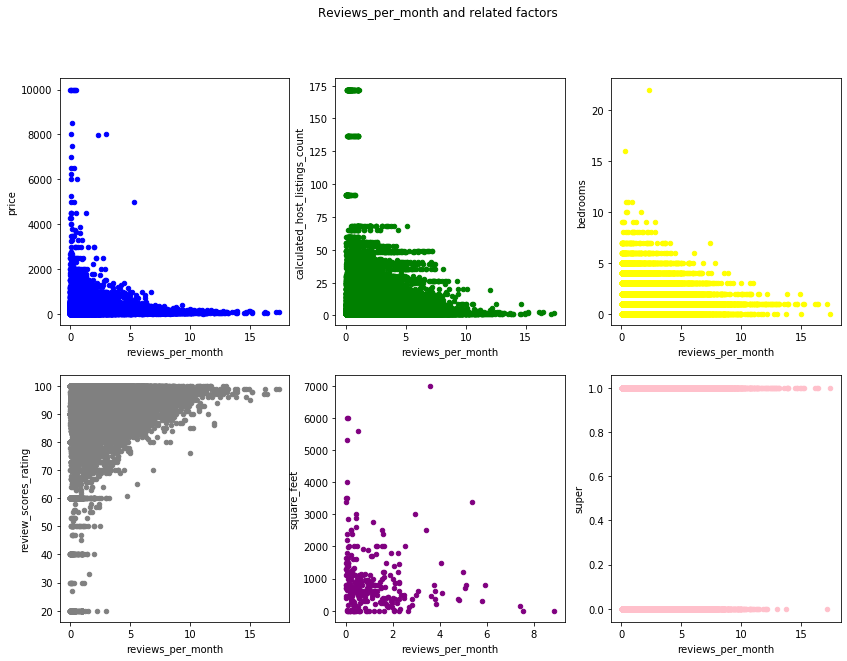

In [16]:
#code to answer question 1
df_list[['minimum_nights','maximum_nights','price','weekly_price','monthly_price']]
import matplotlib.pyplot as plt
fig, [[ax0,ax1,ax2],[ax3,ax4,ax5]] = plt.subplots(nrows=2, ncols=3, figsize = (14,10))
fig.suptitle("Reviews_per_month and related factors")
df_list.loc[df_list.host_is_superhost == 't','super'] = 1 
df_list.loc[df_list.host_is_superhost != 't','super'] = 0 
df_list['price'] = df_list['price'].replace('[\$,]', '', regex=True).astype(float)
df_list.plot(kind= "scatter",color='blue', x = "reviews_per_month", y = "price", ax=ax0)
df_list.plot(kind= "scatter",color='green', x = "reviews_per_month", y = "calculated_host_listings_count", ax=ax1)
df_list.plot(kind= "scatter", color='yellow', x = "reviews_per_month", y = "bedrooms", ax=ax2)
df_list.plot(kind= "scatter", color='grey', x = "reviews_per_month", y = "review_scores_rating", ax=ax3)
df_list.plot(kind= "scatter", color='purple', x = "reviews_per_month", y = "square_feet", ax=ax4)
df_list.plot(kind= "scatter", color='pink', x = "reviews_per_month", y = 'super', ax=ax5)

Question 2: What are the top cities with most listings? Do they have highest average scores and highest average price?



             city  num_of_listing  avg_score  num_hosts   avg_price
130   Los Angeles         27763.0  93.975161    16688.0  201.887872
128    Long Beach          1726.0  94.912449     1112.0  136.772306
261  Santa Monica          1137.0  95.523128      603.0  192.018470
                             city  num_of_listing  avg_score  num_hosts  \
311                        Upland             3.0      100.0        2.0   
197            Pacific Palisades              1.0      100.0        1.0   
185  North Hollywood, Los Angeles             1.0      100.0        1.0   

     avg_price  
311       71.0  
197      500.0  
185      100.0  
 number of cities with average score of 100: 39
                   city  num_of_listing  avg_score  num_hosts  avg_price
150        Lost Angeles             1.0      100.0        1.0      900.0
197  Pacific Palisades              1.0      100.0        1.0      500.0
118    Lake Los Angeles             1.0      100.0        1.0      400.0


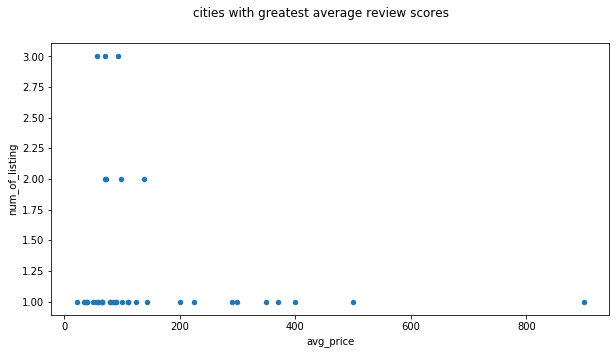

In [17]:
df_city = df_list.groupby(by="city")\
                   .apply(lambda df:pd.Series({"num_of_listing":len(df["review_scores_rating"]),\
                                               "avg_score":np.mean(df["review_scores_rating"])\
                                              ,"num_hosts":len(df["host_id"].unique())\
                                              ,"avg_price":np.mean(df["price"])}))\
                   .reset_index()
df_city.sort_values(['avg_score'],ascending=False).loc[df_city.avg_score==100,:].head(10)
df_city2=df_city.loc[df_city.avg_score==100,:]
print(df_city.sort_values(['num_of_listing'],ascending=False).head(3))
print(df_city.sort_values(['avg_score'],ascending=False).loc[df_city.avg_score==100,:].head(3))
print(" number of cities with average score of 100:" ,len(df_city.loc[df_city.avg_score==100,:]))
print(df_city.sort_values(['avg_price'],ascending=False).loc[df_city.avg_score==100,:].head(3))

fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
fig1.suptitle("cities with greatest average review scores")
df_city2.plot(kind= "scatter", x =  'avg_price', y ="num_of_listing", ax=ax1)

Question 3: Find out the amenities in most common.

Index(['Wifi', 'Essentials', 'Smoke detector', 'Kitchen', 'Heating', 'Hangers',
       'Shampoo', 'TV', 'Carbon monoxide detector', 'Air conditioning',
       'Hair dryer', 'Washer', 'Dryer', 'Laptop friendly workspace', 'Iron'],
      dtype='object')

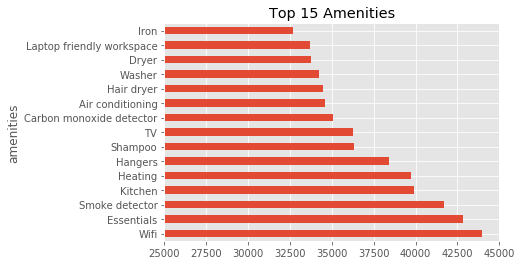

In [18]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig1,ax1 = plt.subplots()
amen = df_list['amenities'].apply(lambda x : x.strip('{}').replace('\"','').split(','))
amen_1 = pd.value_counts([j for i in amen for j in i]).head(15)
# type(amen_1)
amen_1.plot(kind="barh",ax=ax1)
ax1.set_xlim([25000,45000])
ax1.set(title = "Top 15 Amenities",ylabel = "amenities")
amen_1.index


Question 4: What kind of house ( what combination of property, room and bed type) charges the highest price. What is the price? What kind of house is the most common type? How many listings use this classical combination?



In [19]:
df_list['price'] = df_list['price'].replace('[\$,]', '', regex=True).astype(float)
df_three = df_list.groupby(['property_type','room_type','bed_type'])['price'].agg(['count','mean'])
df_num = df_list.groupby(['property_type','room_type','bed_type'])['price'].agg(['count','mean'])
df_three.sort_values(['mean'],ascending=False).head(10),df_num.sort_values(['count'],ascending=False).head(10)

(                                                count        mean
 property_type         room_type       bed_type                   
 Dome house            Entire home/apt Futon         1  5800.00000
 Villa                 Entire home/apt Real Bed    661  2296.90469
 Resort                Private room    Real Bed      1  1055.00000
 Castle                Entire home/apt Real Bed      5  1027.80000
 Earth house           Entire home/apt Couch         1  1000.00000
 Island                Entire home/apt Real Bed      1  1000.00000
 Pension (South Korea) Entire home/apt Real Bed      1   799.00000
 Loft                  Entire home/apt Couch         1   650.00000
 Other                 Entire home/apt Couch         2   560.00000
 Boat                  Entire home/apt Real Bed     24   518.50000,
                                         count        mean
 property_type room_type       bed_type                   
 Apartment     Entire home/apt Real Bed  12213  164.375010
 House         Ent

Text(383.201690873576, 15, 'Average Price  = 373.20')

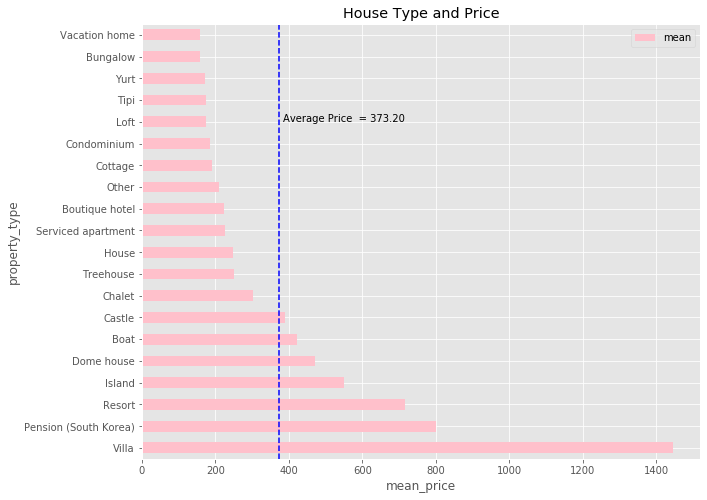

In [20]:
df_three2 = df_list.groupby(['property_type'])['price'].agg(['mean'])
kk=pd.DataFrame(df_three2.sort_values(['mean'],ascending=False).head(20))
kk['property']=kk.index
fig3, ax7 = plt.subplots(nrows=1, ncols=1, figsize = (10,8), sharey=True)
kk.plot(kind= "barh", x = "property", y ='mean', color="pink", ax=ax7)
ax7.set(title = "House Type and Price", xlabel="mean_price", ylabel= "property_type")
mean_hp2 = kk['mean'].mean()
ax7.axvline(mean_hp2, color = "b", linestyle = "--")
text = "Average Price  = %0.2f" % mean_hp2
ax7.annotate(text, xy = (mean_hp2+10,15))

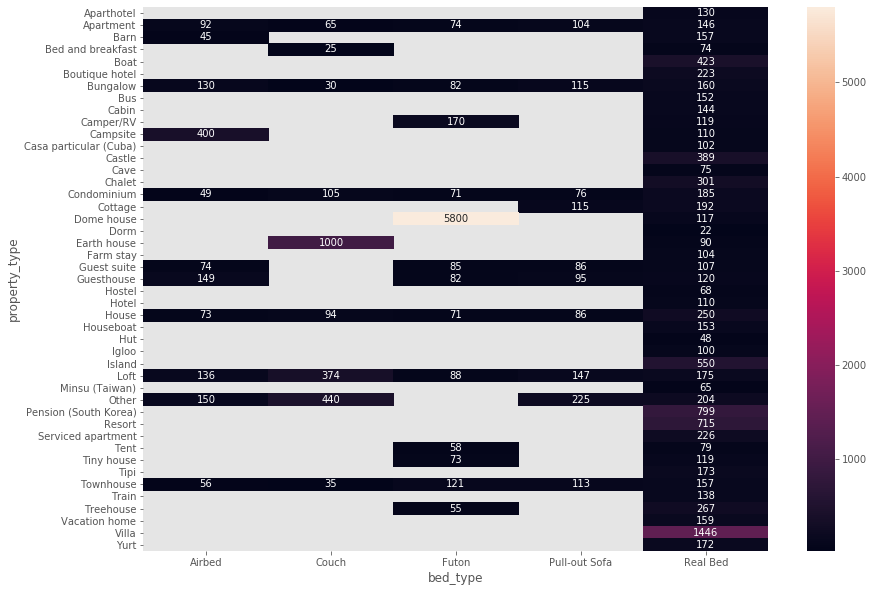

In [21]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(df_list.groupby(['property_type', 'bed_type']).price.mean().unstack(), annot=True,fmt=".0f")

**Question 5: How are these listings distributed in LA? Please show the distribution on a map.



In [22]:
import folium
import json
from folium import plugins

df = df_list[['id','latitude', 'longitude']]


#with open('laMap.geojson') as f:
f={"type":"FeatureCollection","properties":{"kind":"state","state":"CA"},"features":[
{"type":"Feature","properties":{"kind":"county","name":"Los Angeles","state":"CA"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-117.6687,34.8204],[-117.6468,34.2892],[-117.7289,34.0208],[-117.7673,34.0263],[-117.8056,33.9770],[-117.7837,33.9441],[-117.9754,33.9441],[-117.9754,33.9003],[-118.0575,33.8455],[-118.1178,33.7415],[-118.1835,33.7634],[-118.1835,33.7196],[-118.2602,33.7031],[-118.4135,33.7415],[-118.4300,33.7743],[-118.3916,33.8401],[-118.4628,33.9715],[-118.5450,34.0372],[-118.7476,34.0318],[-118.8024,33.9989],[-118.9448,34.0427],[-118.9393,34.0756],[-118.7860,34.1687],[-118.6655,34.1687],[-118.6655,34.2399],[-118.6326,34.2399],[-118.8846,34.7931],[-118.8955,34.8204]]],[[[-118.3314,33.3581],[-118.3150,33.3033],[-118.4574,33.3198],[-118.4902,33.4183],[-118.5614,33.4348],[-118.6052,33.4786],[-118.3697,33.4074]]],[[[-118.5833,33.0350],[-118.3588,32.8159],[-118.4245,32.7994],[-118.4957,32.8542],[-118.6052,33.0131]]]]}}
]}
#laArea = json.load(f)

#initialize the map around LA County
laMap = folium.Map(location=[34.0522,-118.2437], tiles='Stamen Toner', zoom_start=9)

#add the shape of LA County to the map
folium.GeoJson(f).add_to(laMap)

#for each row in the Starbucks dataset, plot the corresponding latitude and longitude on the map
for i,row in df.iterrows():
    folium.CircleMarker((row.latitude,row.longitude), radius=1, weight=1, color='pink', fill_color='red', fill_opacity=.5).add_to(laMap)

#save the map as an html    
laMap.save('laPointMap.html')

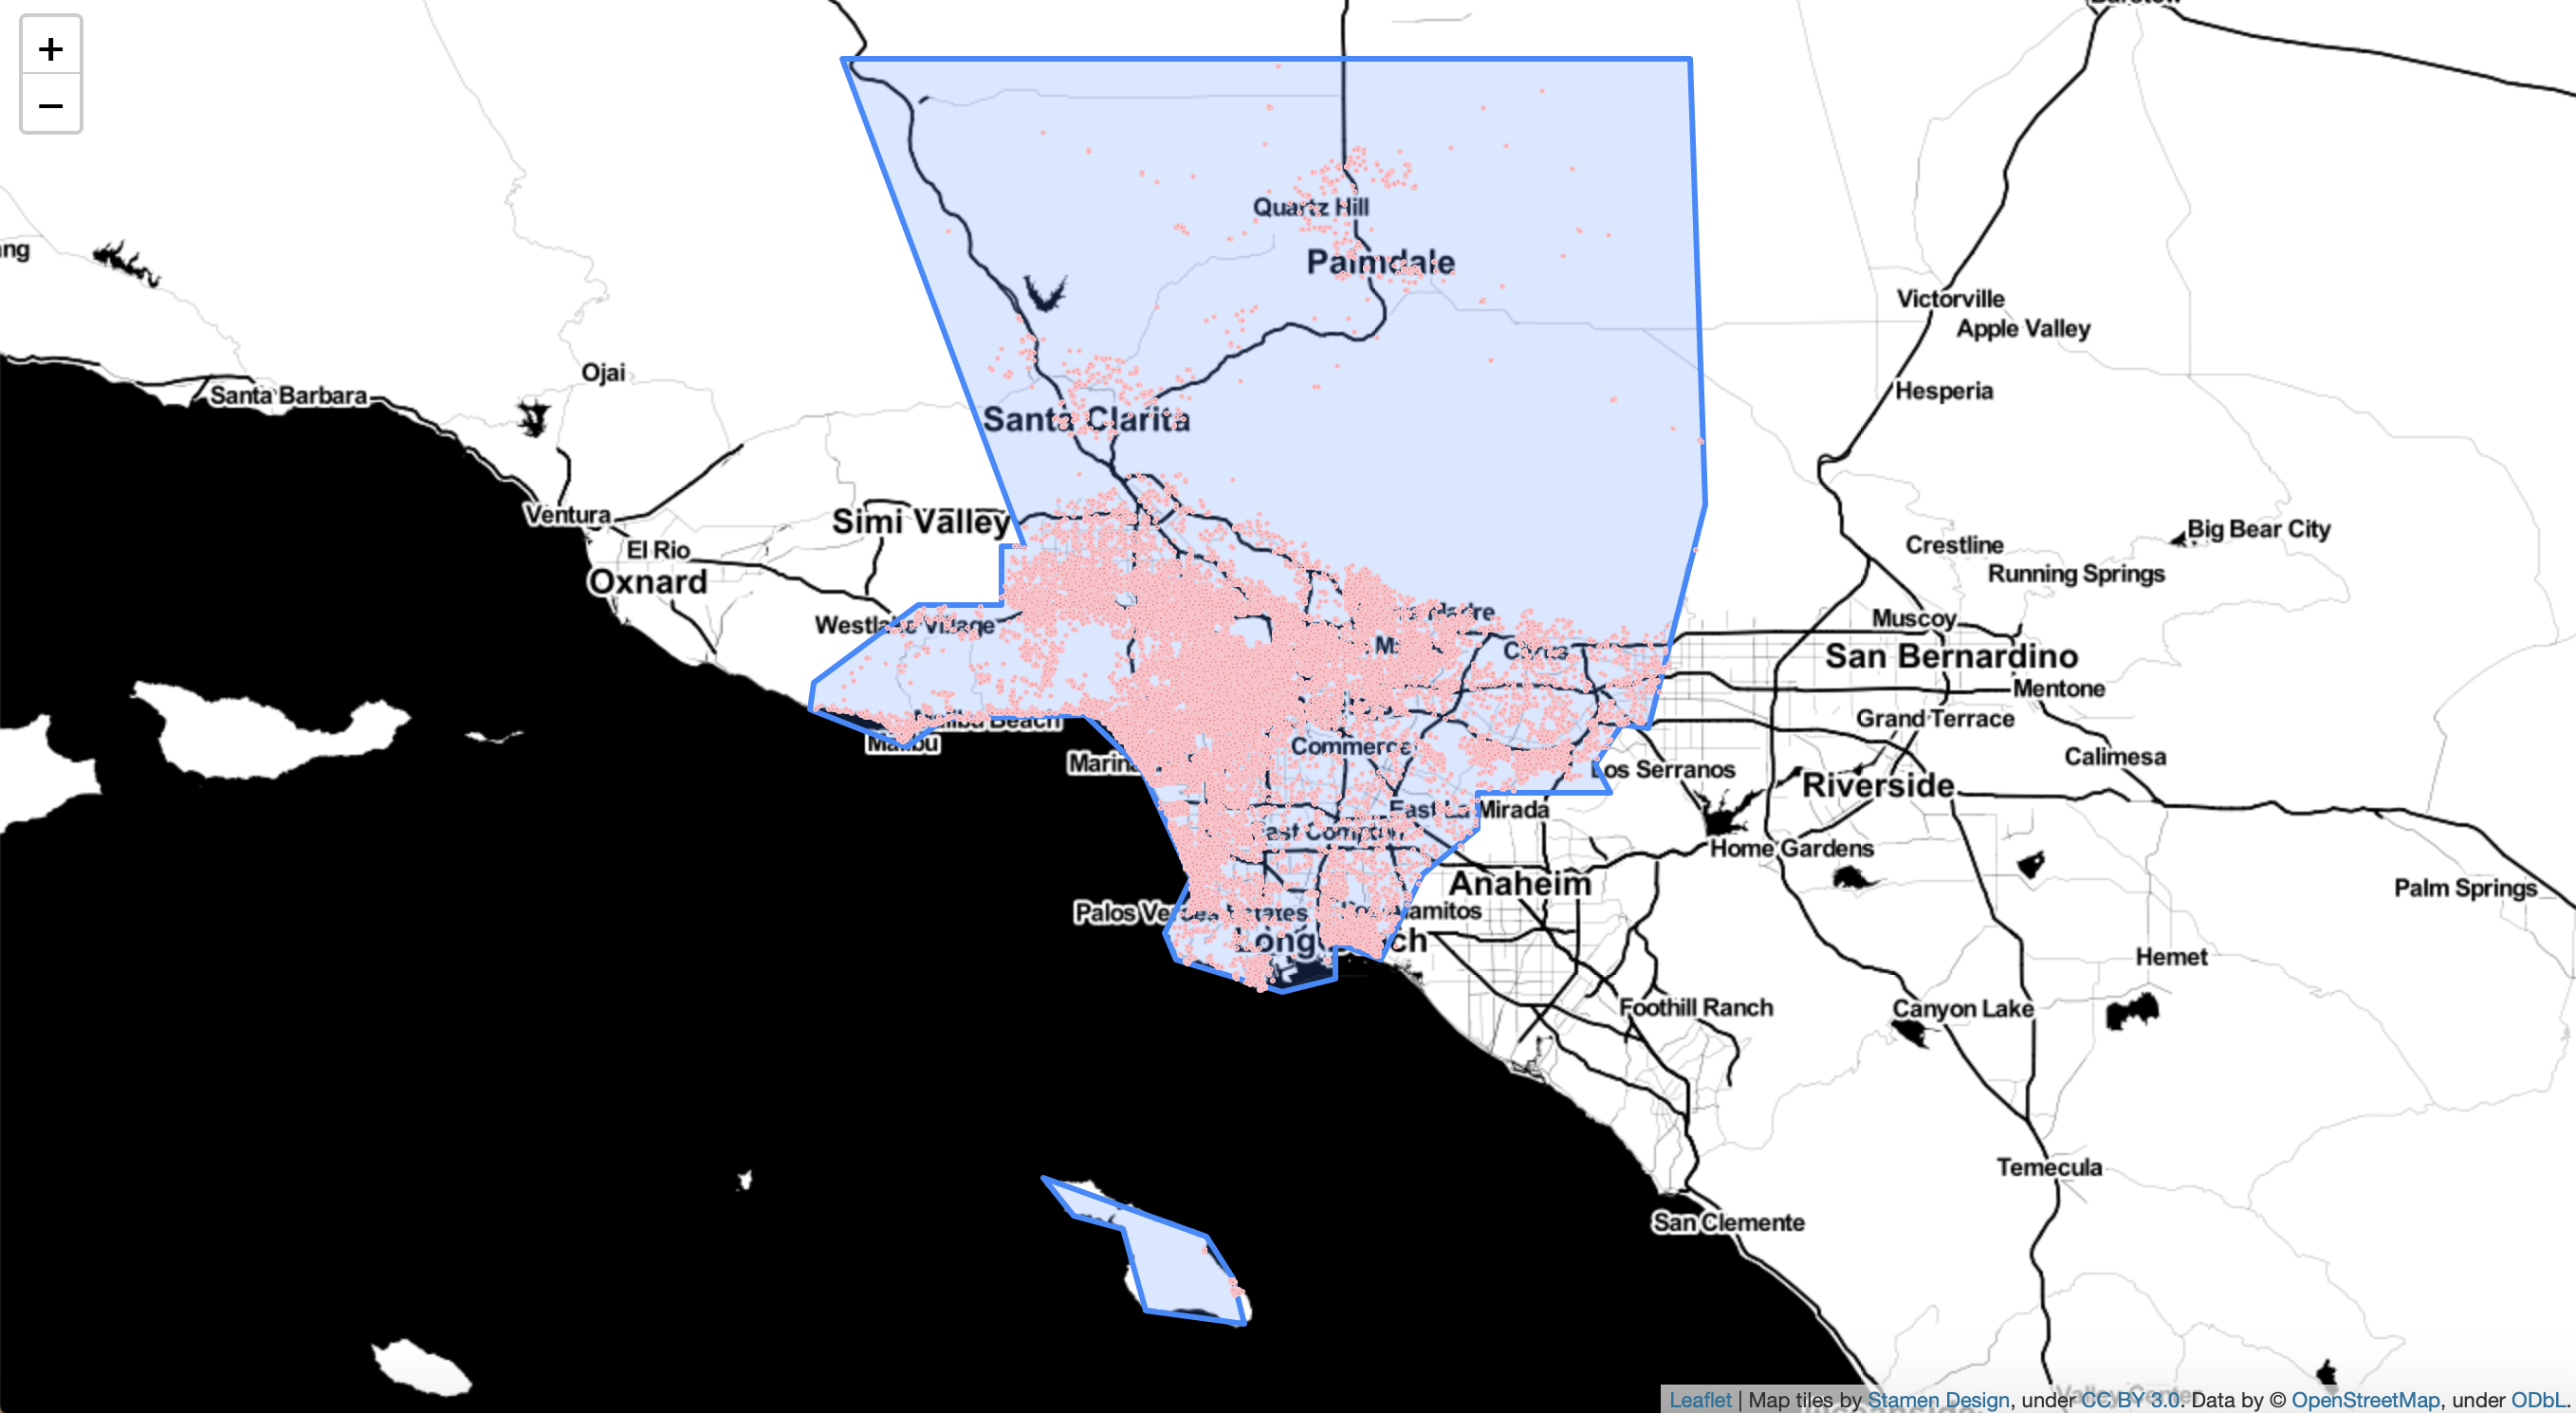

## Executive Summary

Listings with lower price, less bedrooms, higher score rating per review, less listings per host and lower square feet per listing tend to have more reviews per month. Thus, smaller listings with lower price tend to receive more reviews and higher ratings. The reason could be that experienced travelers tend to travel in smaller group and know how to choose houses with nice price and higher quality,

Top cities with most listings are Los Angeles, long beach and Santa Monica. But they have average scores that are under 96 and do not have the highest average price. The reasons may be: the 39 cities with highest average scores all have less than 5 listings so hosts can run a single listing with full attention and enough care. Large cities, however, have greater turnover and may not have high quality all the time.

 The most common amenities are: Wifi,'Essentials', 'Smoke detector', 'Kitchen', 'Heating', 'Hangers', 'Shampoo', 'TV', 'Carbon monoxide detector', 'Air conditioning','Hair dryer', 'Washer', 'Dryer', 'Laptop friendly workspace',and 'Iron'. It seems that Wifi is the most needed in all the airbnb, followed by the esentials. The other equipments could be divided into these parts: the equipments in the bathroom, the equipment for the entertainment. However, from this chart we could tell that guests do not regard the equiments in the kitchen as important elements.

The house type that charges the highest price is a dome house with entire home/apt, using a futon. Other houses that also charge way higher than average are: Villa, Resort and Castle. If Airbnb is building up a high-end market, Villa could be a case. The most common house type is apartment with entire home/apt and real beds. This combination is a relatively safe choice for new hosts and Airbnb could give proper instructions.

Airbnb houses in LA concentrate intensively along the coast line, mostly in the west-southern part. There are also some houses along the mountain line. It is probably because of tourism attractions. The mountain line could be the future trend of Airbnb houses in LA.
